<h1>Linear SVM with Batch Gradient Descent</h1>

In [18]:
from sklearn.base import BaseEstimator
from sklearn import datasets
import numpy as np

class LinSVC(BaseEstimator):
    def __init__(self,C,eta0,eta_d,n_epochs,random_state = None):
        self.C = C
        self.eta0 = eta0
        self.eta_d = eta_d
        self.n_epochs = n_epochs
        self.random_state = random_state
    def eta(self,epoch):
        return self.eta0/(epoch + self.eta_d)
    def fit(self,X,y):
        if self.random_state != None:
            np.random.seed(self.random_state)
        #set up a random weight vector 
        w = np.random.rand(X.shape[1],1)
        #set up b
        b = 0
        m = len(X)
        #t will be -1 when y = 0 and 1 when y = 1
        t = y
        t[np.where(t == 0)[0]] = -1
        t[np.where(t == 1)[0]] = 1
        #element wise multiply t with X
        X_t = X*t.reshape(-1,1)
        self.costs = []
        #Training
        for epoch in range(self.n_epochs):
            #the support vectors will occur between wx + b = -1
            #and wx + b = 1
            #if we multiply with t where t = 1 when y = 1 and
            #t = -1 when y = 0, all wx+b within -1 to 1 will occur
            #between 0 and 1. Hence all support vectors occur in
            #this range
            support_vectors_idx = np.where((np.dot(X_t,w) + (t*b).reshape(-1,1))<1)[0]
            X_t_sv = X_t[support_vectors_idx]
            t_sv = t[support_vectors_idx]
            #for cost we only take the support vectors into consideration
            #also the cost equation is the Lagrangian equation
            #for support vectors
            #we use only support vectors to calculate the cost because
            #self.C != 0 only for support vectors
            #If we used the kernel , the lagrangian would be the dual form lagrangian here
            J = (1/2)*np.dot(np.transpose(w),w) + self.C*(1) - self.C*np.sum(np.dot(X_t_sv,w)) - self.C*np.sum(b*t_sv)
            self.costs.append(J[0][0])
            #derivative of J with respect to w
            w_gradient_vector = w - self.C*np.sum(X_t_sv,axis = 0).reshape(-1,1)
            #derivative of J with respect to b
            b_derivative = -self.C*np.sum(t_sv)
            
            #gradient descent
            w = w - self.eta(epoch)*w_gradient_vector
            b = b - self.eta(epoch)*b_derivative
            
        self.intercept_ = np.array([b])
        self.coef_ = np.array([w])
        support_vectors_idx = np.where((np.dot(X_t,w) + t*b)<1)[0].ravel()
        self.support_vectors_ = X[support_vectors_idx]
        return self
    
    def decision_function(self,X):
        #If we used a kernelized method, instead of np.dot(X,self.coef_[0])
        #we would have self.C*t_sv*kernel(self.supportvector*X)
        return np.dot(X,self.coef_[0]) + self.intercept_[0]
    
    def predict(self,X):
        return ((np.dot(X,self.coef_[0]) + self.intercept_[0])>=0).astype(np.float64)
    


In [23]:
iris = datasets.load_iris()
X = iris["data"][:,(2,3)]
y = (iris["target"] == 2).astype(np.float64)

C = 2
svm_clf = LinSVC(C=C,eta0 = 10, eta_d = 1000, n_epochs = 60000,random_state = 2)
svm_clf.fit(X,y)           
svm_clf.predict(np.array([[5,2],[4,1]]))            

array([[1.],
       [0.]])

(0, 100)

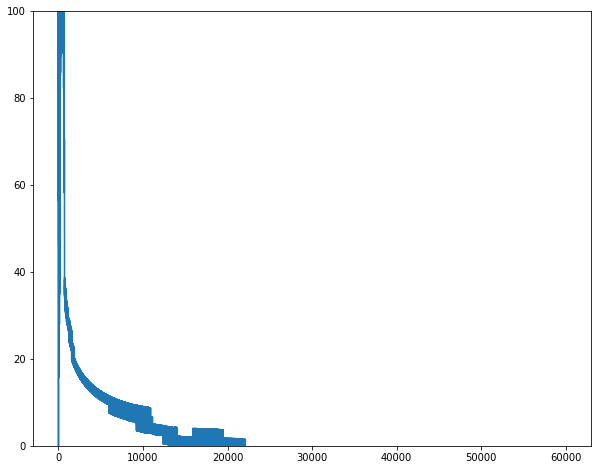

In [24]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1,1,figsize = (10,8))
ax.plot(range(len(svm_clf.costs)),svm_clf.costs)
ax.set_ylim([0,100])

In [25]:
svm_clf.intercept_

array([-15.56770527])

In [26]:
svm_clf.coef_

array([[[2.28126905],
        [2.7161964 ]]])

<h2>Training using the inbuilt SVC method</h2>

In [27]:
from sklearn.svm import SVC
svc_sklearn = SVC(kernel = 'linear',C = 2)
svc_sklearn.fit(X,y)
svc_sklearn.predict(np.array([[5,2],[4,1]]))

array([ 1., -1.])

In [28]:
svc_sklearn.intercept_

array([-15.51721253])

In [29]:
svc_sklearn.coef_

array([[2.27128546, 2.71287145]])

In [32]:
idx0 = np.where(y == -1)[0]
idx1 = np.where(y == 1)[0]

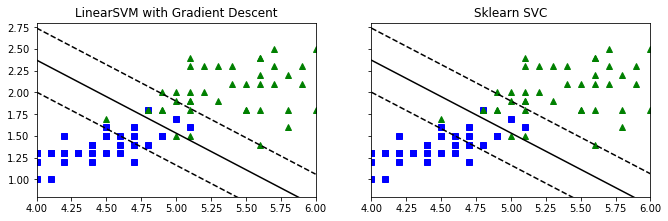

In [56]:
fig,ax = plt.subplots(1,2,figsize = (11,3.2),sharey = True)
ax[0].set_xlim(4,6)
ax[0].set_ylim(0.8,2.8)
ax[0].plot(X[:,0][idx0],X[:,1][idx0],'bs')
ax[0].plot(X[:,0][idx1],X[:,1][idx1],'g^')


ax[1].set_xlim(4,6)
#ax[0].set_ylim(0.5,3.0)
ax[1].plot(X[:,0][idx0],X[:,1][idx0],'bs')
ax[1].plot(X[:,0][idx1],X[:,1][idx1],'g^')


w_linsvc = svm_clf.coef_[0]
b_linsvc = svm_clf.intercept_[0]

w_svc = svc_sklearn.coef_[0]
b_svc = svc_sklearn.intercept_[0]

x0 = np.linspace(4,6,200)
decision_boundary_linsvc = -(w_linsvc[0]/w_linsvc[1] * x0) - (b_linsvc/w_linsvc[1])
decision_boundary_one_linsvc = (1/w_linsvc[1]) -(w_linsvc[0]/w_linsvc[1] * x0) - (b_linsvc/w_linsvc[1])
decision_boundary_minusone_linsvc = -(1/w_linsvc[1]) -(w_linsvc[0]/w_linsvc[1] * x0) - (b_linsvc/w_linsvc[1])

decision_boundary_svc = -(w_svc[0]/w_svc[1] * x0) - (b_svc/w_svc[1])
decision_boundary_one_svc = (1/w_svc[1]) -(w_svc[0]/w_svc[1] * x0) - (b_svc/w_svc[1])
decision_boundary_minusone_svc = -(1/w_svc[1]) -(w_svc[0]/w_svc[1] * x0) - (b_svc/w_svc[1])



ax[0].plot(x0,decision_boundary_linsvc,'k-')
ax[0].plot(x0,decision_boundary_one_linsvc,'k--')
ax[0].plot(x0,decision_boundary_minusone_linsvc,'k--')

ax[1].plot(x0,decision_boundary_svc,'k-')
ax[1].plot(x0,decision_boundary_one_svc,'k--')
ax[1].plot(x0,decision_boundary_minusone_svc,'k--')

ax[0].set_title('LinearSVM with Gradient Descent')
ax[1].set_title('Sklearn SVC')
plt.show()